In [5]:
import pandas as pd
import seaborn as sns
import matplotlib as plt

In [2]:
# prod - датасет с добычей
# prod_gs - Дебит газа сепарации
# prod_sg - Дебит сухого газа
# prod_nk - Дебит нестабильного конденсата 
# prod_sk - Дебит стабильного конденсата
# prod_zd - Забойное давление
# prod_ud - Устьевое давление
# prod_temp - Устьевые температуры
prod_gs = pd.read_excel("Добыча.xlsx",  sheet_name = 1, index_col = 0)

prod_nk = pd.read_excel("Добыча.xlsx",  sheet_name = 2, index_col = 0)

prod_zd = pd.read_excel("Добыча.xlsx",  sheet_name = 3, index_col = 0)

prod_ud = pd.read_excel("Добыча.xlsx",  sheet_name = 4, index_col = 0)

prod_temp = pd.read_excel("Добыча.xlsx",  sheet_name = 5, index_col = 0)

prod_sg = pd.read_excel("Добыча.xlsx",  sheet_name = 6, index_col = 0)

prod_sk = pd.read_excel("Добыча.xlsx",  sheet_name = 7, index_col = 0)

In [3]:
# exp - датасет с исследованиями
# _gs - Дебит газа сепарации
# _nk - Дебит нестабильного конденсата 
# _sk - Дебит стабильного конденсата
# _zd - Забойное давление
# _ud - Устьевое давление
# _temp - Устьевые температуры
exp_gs = pd.read_excel("Исследования.xlsx",  sheet_name = 1, index_col = 0)

exp_nk = pd.read_excel("Исследования.xlsx",  sheet_name = 2, index_col = 0)

exp_zd = pd.read_excel("Исследования.xlsx",  sheet_name = 3, index_col = 0)

exp_ud = pd.read_excel("Исследования.xlsx",  sheet_name = 4, index_col = 0)

exp_temp = pd.read_excel("Исследования.xlsx",  sheet_name = 5, index_col = 0)

exp_sk = pd.read_excel("Исследования.xlsx",  sheet_name = 6, index_col = 0)

In [18]:
prod_temp.describe()

,1,2,3,4,5,6,7,8,9,10,...,71,72,73,74,75,76,77,78,79,80
count,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,...,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000
mean,43.506983,43.920815,43.816685,61.628068,60.239818,60.292745,11.018734,10.562840,62.272351,65.737728,...,60.224801,9.139306,9.147091,29.087822,28.368378,27.727549,27.660804,60.774406,60.292623,45.228955
std,31.256756,29.698847,29.646635,15.491001,15.424771,15.280978,24.997297,23.963536,15.824317,3.471092,...,18.665136,23.085645,23.106802,33.013232,32.261111,33.307490,33.231412,18.773075,18.638767,24.716050
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,57.942632,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,62.360714,60.576912,61.307297,0.000000,0.000000,63.846667,63.079262,...,63.652299,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,64.529911,63.602500,52.830000
50%,63.978569,60.918498,61.296926,64.816336,63.116070,62.680893,0.000000,0.000000,66.583733,65.903913,...,66.142771,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,66.723750,66.093368,56.536842
75%,65.462402,64.401688,63.501254,66.790734,66.632330,66.451083,0.000000,0.000000,68.513258,68.407415,...,67.473750,0.000000,0.000000,65.404596,63.047083,66.728862,66.363606,67.679464,68.139147,59.975833
max,69.605368,69.656698,70.054074,73.792000,71.822000,70.054074,68.992121,65.623629,70.758000,71.426000,...,71.726774,67.234615,68.114286,68.200000,68.025182,68.212903,68.523333,71.210000,69.755806,64.129310


In [63]:
# все флоаты, все ок
prod_temp.dtypes

1     float64
2     float64
3     float64
4     float64
5     float64
       ...   
76    float64
77    float64
78    float64
79    float64
80    float64
Length: 80, dtype: object

# Поработаем с данными первой скважины
# после напишем алгоритм, проходящий по всем скважинам

### не спрашивайте, почему не циклом, потом напишу его :)

## Замерджим все данные в один датафрейм

In [102]:
# возьмём 1 столбец, т.е. данные по первой скважине
prod_gs_1 = prod_gs.iloc[:, [0]]
prod_nk_1 = prod_nk.iloc[:, [0]]
prod_zd_1 = prod_zd.iloc[:, [0]]
prod_ud_1 = prod_ud.iloc[:, [0]]
prod_temp_1 = prod_temp.iloc[:, [0]]
prod_sg_1 = prod_sg.iloc[:, [0]]
prod_sk_1 = prod_sk.iloc[:, [0]]

In [103]:
# чтобы после мёрджа понимать, что у нас за данные
prod_gs_1.columns = [prod_gs_1.index.name]
prod_nk_1.columns = [prod_nk_1.index.name]
prod_zd_1.columns = [prod_zd_1.index.name]
prod_ud_1.columns = [prod_ud_1.index.name]
prod_temp_1.columns = [prod_temp_1.index.name]
prod_sg_1.columns = [prod_sg_1.index.name]
prod_sk_1.columns = [prod_sk_1.index.name]

In [104]:
# замёрджим
well_1 = prod_gs_1.merge(prod_nk_1, left_index=True, right_index=True)
well_1 = well_1.merge(prod_zd_1, left_index=True, right_index=True)
well_1 = well_1.merge(prod_ud_1, left_index=True, right_index=True)
well_1 = well_1.merge(prod_temp_1, left_index=True, right_index=True)
well_1 = well_1.merge(prod_sg_1, left_index=True, right_index=True)
well_1 = well_1.merge(prod_sk_1, left_index=True, right_index=True)

In [105]:
well_1.index.name = 'date'

In [106]:
# дату в отдельный столбец
well_1 = well_1.reset_index()

In [119]:
well_1

,date,"Дебит ГС, тыс.м3/сут","Дебит НК, т/сут",Р зб. МПа,"Устьевое давление, МПа","Устьевая температура, град С","Дебит СГ, тыс. м3/сут","Дебит СК, т/сут"
0,2021-01-01,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
1,2021-02-01,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
2,2021-03-01,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
3,2021-04-01,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
4,2021-05-01,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
5,2021-06-01,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
6,2021-07-01,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
7,2021-08-01,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
8,2021-09-01,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
9,2021-10-01,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN


In [130]:
# до 2021-12-01 все параметры нули или наны, скважина не работала
# уберём их, мб будет влиять на точность модели в будущем 
well_1 = well_1.iloc[12:, :].reset_index().drop(columns='index')

In [131]:
well_1

,date,"Дебит ГС, тыс.м3/сут","Дебит НК, т/сут",Р зб. МПа,"Устьевое давление, МПа","Устьевая температура, град С","Дебит СГ, тыс. м3/сут","Дебит СК, т/сут"
0,2023-01-01,384.670721,127.075189,45.238710,36.261290,64.173871,418.159742,95.122505
1,2023-02-01,387.002342,122.115013,44.878571,35.862500,65.139286,420.694350,106.109757
2,2023-03-01,395.302568,122.772539,44.497097,35.455172,66.487241,429.717194,101.761907
3,2023-04-01,439.334468,134.289681,43.986576,34.743076,68.104148,477.582478,116.941847
4,2023-05-01,356.436543,110.875522,44.394672,35.453802,63.041077,387.467525,90.298487
5,2023-06-01,1.890128,105.587053,44.486467,35.371655,61.944799,369.365285,84.372360
6,2023-07-01,427.012603,130.552295,43.560924,34.483452,67.477214,464.187876,102.859770
7,2023-08-01,409.410873,124.089055,43.093878,34.092856,65.270854,445.053759,98.881745
8,2023-09-01,421.158425,127.357340,42.976957,33.988120,60.780675,457.824034,101.786832
9,2023-10-01,400.790992,120.857992,42.499163,33.450471,65.005096,435.683435,97.587066


# Можно графики построить всякие

<Axes: xlabel='Дебит ГС, тыс.м3/сут', ylabel='Count'>

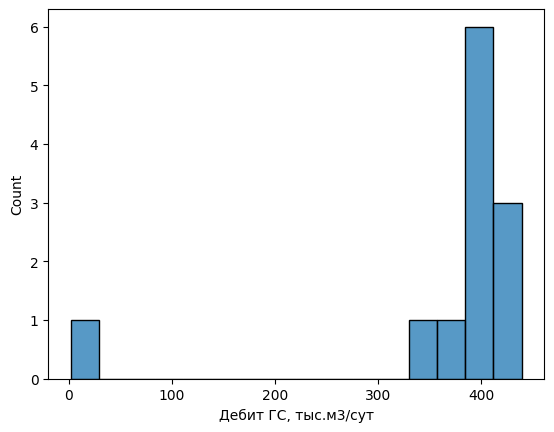

In [135]:
# выбросы какие-то
# ставлю на то, что просто аномалии данных
sns.histplot(well_1['Дебит ГС, тыс.м3/сут'])

<Axes: xlabel='date', ylabel='Дебит ГС, тыс.м3/сут'>

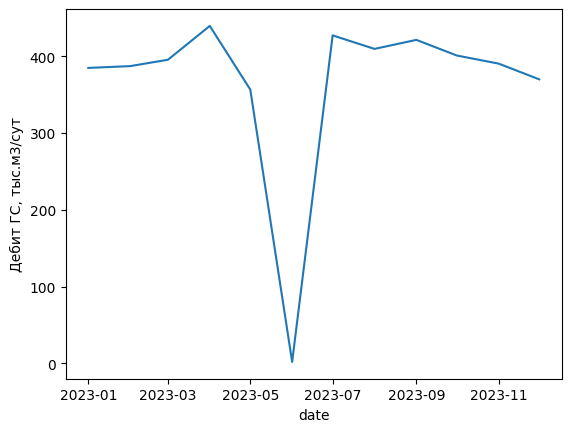

In [137]:
# ну что это такое
sns.lineplot(data = well_1, x = 'date', y = 'Дебит ГС, тыс.м3/сут')

# В пятой строке в дебите ГС значение сильно выбивается
# пока не удаляю её, может, аппроксимировать значение

<Axes: xlabel='Устьевое давление, МПа', ylabel='Устьевая температура, град С'>

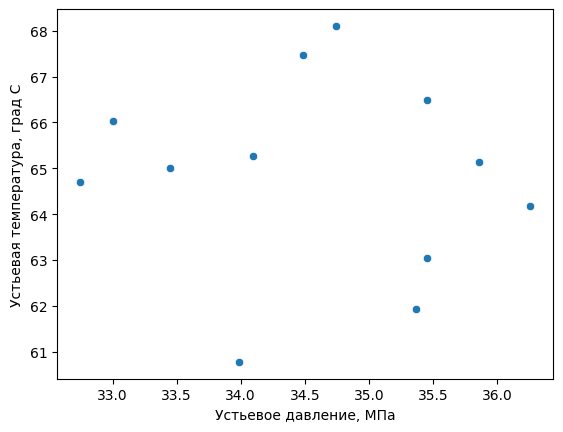

In [139]:
sns.scatterplot(data = well_1, y = "Устьевая температура, град С", x = 'Устьевое давление, МПа')